In [1]:
import numpy as np
import pandas as pd

In [2]:
# Importando dataset
review = pd.read_csv('Datasets/olist_order_reviews_dataset.csv', sep=',', encoding='iso-8859-1')
pedidos = pd.read_csv('Datasets/olist_order_items_dataset.csv', sep=',', encoding='iso-8859-1')

In [3]:
# Relacionando os dataframes
review_pedidos = pd.merge(review, pedidos, on='order_id', how='inner')

In [4]:
# Calculando a receita de cada vendedor
receita_por_seller = review_pedidos.groupby('seller_id')['price'].sum()


# Ordenando os vendedores com base em sua receita
sellers_ordenados_por_receita = receita_por_seller.sort_values(ascending=False)

sellers_ordenados_por_receita 

seller_id
4869f7a5dfa277a7dca6462dcf3b52b2    228071.04
53243585a1d6dc2643021fd1853d8905    220740.05
4a3ca9315b744ce9f8e9374361493884    200561.42
fa1c13f2614d7b5c4749cbc52fecda94    192774.43
7c67e1448b00f6e969d365cea6b010ab    188017.85
                                      ...    
34aefe746cd81b7f3b23253ea28bef39         8.00
702835e4b785b67a084280efca355756         7.60
1fa2d3def6adfa70e58c276bb64fe5bb         6.90
77128dec4bec4878c37ab7d6169d6f26         6.50
cf6f6bc4df3999b9c6440f124fb2f687         3.50
Name: price, Length: 3090, dtype: float64

In [5]:
# Converti os valores do dataframe 'sellers_ordenados_por_receita' em coluna para trabalhar em cima desses preços
# Convertendo a série em um DataFrame
sellers_df = sellers_ordenados_por_receita.to_frame()

# Resetando o índice e renomeando as colunas
sellers_df.reset_index(inplace=True)
sellers_df.rename(columns={'index': 'seller_id', 0: 'receita'}, inplace=True)

sellers_df

,seller_id,price
0,4869f7a5dfa277a7dca6462dcf3b52b2,228071.04
1,53243585a1d6dc2643021fd1853d8905,220740.05
2,4a3ca9315b744ce9f8e9374361493884,200561.42
3,fa1c13f2614d7b5c4749cbc52fecda94,192774.43
4,7c67e1448b00f6e969d365cea6b010ab,188017.85
...,...,...
3085,34aefe746cd81b7f3b23253ea28bef39,8.00
3086,702835e4b785b67a084280efca355756,7.60
3087,1fa2d3def6adfa70e58c276bb64fe5bb,6.90
3088,77128dec4bec4878c37ab7d6169d6f26,6.50


In [6]:
# Relacionando dataframes
relacao = pd.merge(sellers_df, review_pedidos, on='seller_id', how='inner')

In [7]:
# Eliminando duplicidades do dataframe anterior
relacao1 = relacao.drop_duplicates(subset='seller_id')

In [8]:
# Para melhor trabalho, decidi selecionar as colunas que são importantes
relacao2 = relacao1[['seller_id', 'price_x', 'review_score', 'review_comment_title', 'review_comment_message']]

In [9]:
# Ordenei os dados anteriores para extrair insights
ordenado = relacao2.sort_values(by='price_x', ascending=False)

In [10]:
#Criei um novo dataframe com os 10 melhores vendedores e suas avaliações
top10_sellers_reviews = ordenado.iloc[:10, 0:5]

In [11]:
# Conclusão:
# O fato de ter bons rendimentos não significa ter as melhores avaliações
# Foi observado que as avaliações dos clientes estão direcionados a entrega e produto, não necessariamente ao vendedor
top10_sellers_reviews

,seller_id,price_x,review_score,review_comment_title,review_comment_message
0,4869f7a5dfa277a7dca6462dcf3b52b2,228071.04,5,NaN,NaN
1148,53243585a1d6dc2643021fd1853d8905,220740.05,5,NaN,Ãtimo custo-benefÃ­cio
1556,4a3ca9315b744ce9f8e9374361493884,200561.42,5,NaN,NaN
3540,fa1c13f2614d7b5c4749cbc52fecda94,192774.43,5,NaN,"Amei achei lindo ,muito delicado adorei"
4122,7c67e1448b00f6e969d365cea6b010ab,188017.85,2,NaN,NaN
5489,7e93a43ef30c4f03f38b393420bc753a,176201.88,1,NaN,fiz minha compra faz 30 dias e nÃ£o recebi ain...
5828,da8622b14eb17ae2831f4ac5b9dab84a,161993.97,1,NaN,NaN
7396,7a67c85e85bb2ce8582c35f2203ad736,141130.58,5,NaN,Sempre compro no stark e sempre sou bem atendi...
8562,1025f0e2d44d7041d6cf58b6550e0bfa,139484.38,5,NaN,NaN
9993,955fee9216a65b617aa5c0531780ce60,133948.81,1,falta de produto e quebra,Faltou 1 produto e os que recebi 1 veio quebrado


In [12]:
# Criando um novo dataframe com colunas apropriadas para fazer o gráfico
sellers_reviews = top10_sellers_reviews.iloc[:10, 0:3]
sellers_reviews

,seller_id,price_x,review_score
0,4869f7a5dfa277a7dca6462dcf3b52b2,228071.04,5
1148,53243585a1d6dc2643021fd1853d8905,220740.05,5
1556,4a3ca9315b744ce9f8e9374361493884,200561.42,5
3540,fa1c13f2614d7b5c4749cbc52fecda94,192774.43,5
4122,7c67e1448b00f6e969d365cea6b010ab,188017.85,2
5489,7e93a43ef30c4f03f38b393420bc753a,176201.88,1
5828,da8622b14eb17ae2831f4ac5b9dab84a,161993.97,1
7396,7a67c85e85bb2ce8582c35f2203ad736,141130.58,5
8562,1025f0e2d44d7041d6cf58b6550e0bfa,139484.38,5
9993,955fee9216a65b617aa5c0531780ce60,133948.81,1


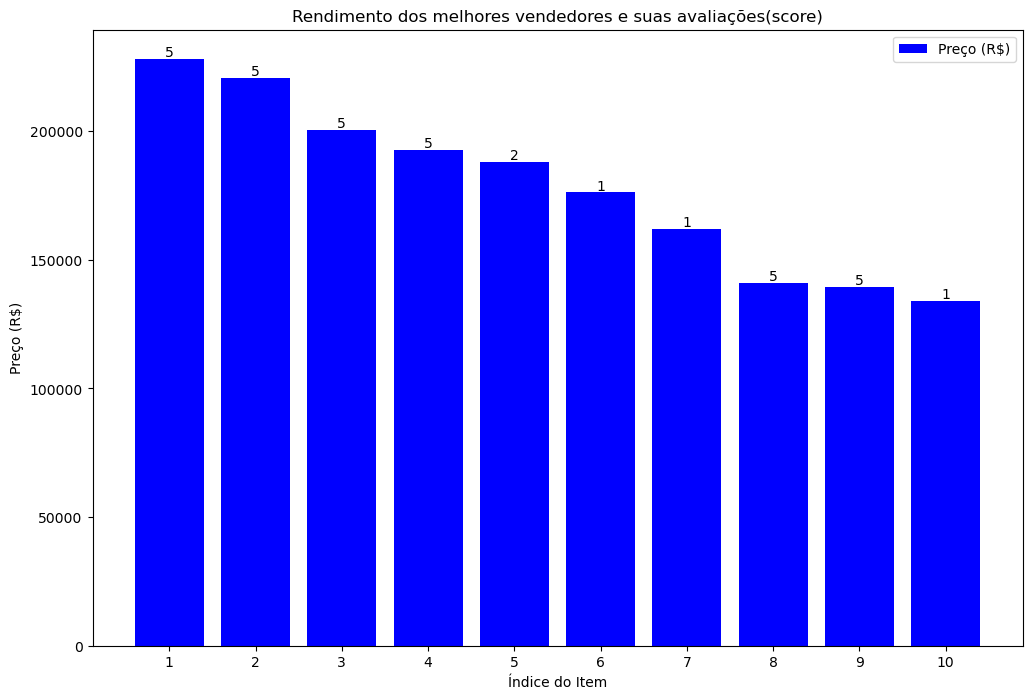

In [13]:
# Não estava conseguindo fazer o gráfico com esses valores, recorri ao Chatgpt para me auxiliar
import matplotlib.pyplot as plt

# Criando o índice para o eixo x
x_pos = range(len(sellers_reviews))

# Criando o gráfico de barras
plt.figure(figsize=(12, 8))

# Plotando as barras de preços
plt.bar(x_pos, sellers_reviews['price_x'], color='blue', label='Preço (R$)')

# Adicionando os valores de pontuações de avaliação sobre as barras
for i, (price, score) in enumerate(zip(sellers_reviews['price_x'], sellers_reviews['review_score'])):
    plt.text(i, price + 1000, str(score), ha='center', color='black')

plt.xlabel('Índice do Item')
plt.ylabel('Preço (R$)')
plt.title('Rendimento dos melhores vendedores e suas avaliações(score)')
plt.xticks(x_pos, range(1, len(sellers_reviews) + 1))
plt.legend()
plt.savefig('Rendimento dos melhores vendedores e suas avaliações')

plt.show()




In [14]:
# Ordenando pelo menor rendimento dos vendedores
ordenado = relacao2.sort_values(by='price_x')

In [15]:
# Criei um novo dataframe com os 10 piores rendimentos dos vendedores
sellers_last = ordenado.iloc[:10, 0:5]

In [16]:
# Conclusão:
# Ter menores rendimentos não siginifica ter piores avaliações, pois muitos vendedores com rendimento ruim tiveram boas avaliações
# Foi constatado que as avaliações estão mais relacionadas ao produto do que atendimento
sellers_last

,seller_id,price_x,review_score,review_comment_title,review_comment_message
112371,cf6f6bc4df3999b9c6440f124fb2f687,3.50,5,NaN,Tudo ocorreu de forma eficiente
112370,77128dec4bec4878c37ab7d6169d6f26,6.50,5,NaN,"Chegou antes do prazo, produto muito bom!!"
112369,1fa2d3def6adfa70e58c276bb64fe5bb,6.90,1,Entrega faltando produtos,Fiz pedido de 6 produtos e sÃ³ recebi 2.
112368,702835e4b785b67a084280efca355756,7.60,5,NaN,NaN
112367,34aefe746cd81b7f3b23253ea28bef39,8.00,1,NaN,NaN
112366,ad14615bdd492b01b0d97922e87cb87f,8.25,5,NaN,NaN
112365,4965a7002cca77301c82d3f91b82e1a9,8.49,5,NaN,"Ficou pequeno, mas chegou no prazo."
112364,0f94588695d71662beec8d883ffacf09,9.00,5,NaN,Muito bonita
112363,c18309219e789960add0b2255ca4b091,9.90,5,NaN,NaN
112362,95cca791657aabeff15a07eb152d7841,9.99,5,NaN,NaN


In [17]:
# Fazendo um dataframe com as colunas que quero trabalhar
last_seller = sellers_last[['seller_id', 'price_x', 'review_score', ]]
last_seller

,seller_id,price_x,review_score
112371,cf6f6bc4df3999b9c6440f124fb2f687,3.50,5
112370,77128dec4bec4878c37ab7d6169d6f26,6.50,5
112369,1fa2d3def6adfa70e58c276bb64fe5bb,6.90,1
112368,702835e4b785b67a084280efca355756,7.60,5
112367,34aefe746cd81b7f3b23253ea28bef39,8.00,1
112366,ad14615bdd492b01b0d97922e87cb87f,8.25,5
112365,4965a7002cca77301c82d3f91b82e1a9,8.49,5
112364,0f94588695d71662beec8d883ffacf09,9.00,5
112363,c18309219e789960add0b2255ca4b091,9.90,5
112362,95cca791657aabeff15a07eb152d7841,9.99,5


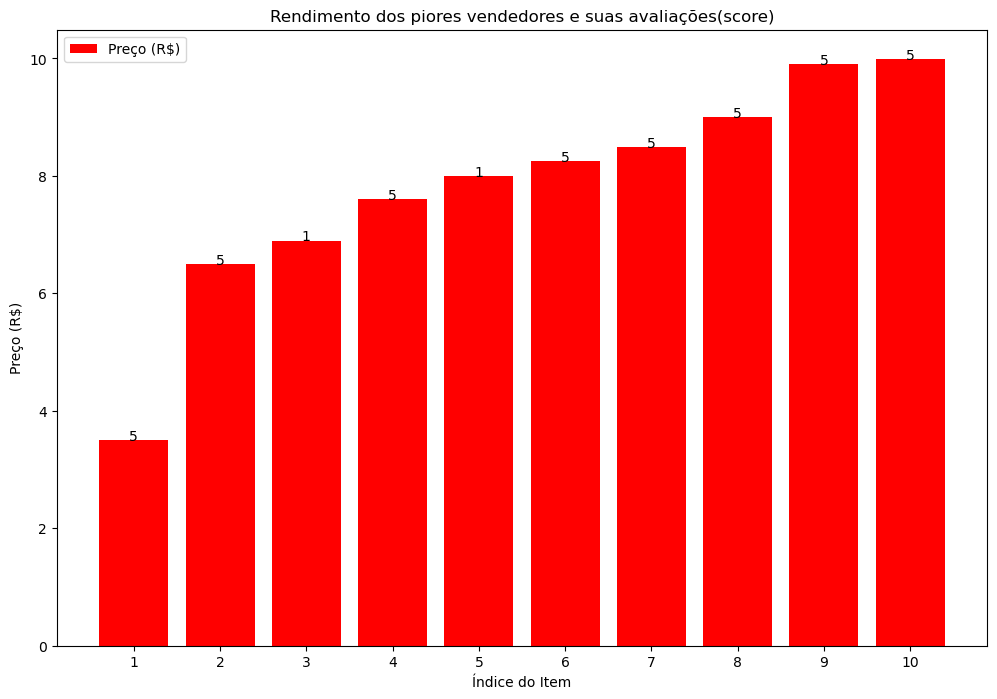

In [18]:
# Criando o índice para o eixo x
x_pos = range(len(last_seller))

# Criando o gráfico de barras
plt.figure(figsize=(12, 8))

# Plotando as barras de preços
plt.bar(x_pos, last_seller['price_x'], color='red', label='Preço (R$)')

# Adicionando os valores de pontuações de avaliação sobre as barras
for i, (price, score) in enumerate(zip(last_seller['price_x'], last_seller['review_score'])):
    plt.text(i, price + 0, str(score), ha='center', color='black')

plt.xlabel('Índice do Item')
plt.ylabel('Preço (R$)')
plt.title('Rendimento dos piores vendedores e suas avaliações(score)')
plt.xticks(x_pos, range(1, len(last_seller) + 1))
plt.legend()
plt.savefig('Rendimento dos piores vendedores e suas avaliações')

plt.show()